## NLP Project 2

In [38]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.datasets import imdb 
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten
from tensorflow.keras.backend import clear_session

import re

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### PART A

DOMAIN: Digital content and entertainment industry

CONTEXT: The objective of this project is to build a text classification model that analyses the customer's
sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build
an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.

DATA DESCRIPTION: The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative).
Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For
convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most
frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of
10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

PROJECT OBJECTIVE: To Build a sequential NLP classifier which can use input text parameters to determine the
customer sentiments.

Import and Analyse the dataseet

In [2]:
max_words = 10000
max_len = 500
embed_size = 32

Loading dataset with 10000 most frequently used words

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

In [4]:
X = np.concatenate((X_train, X_test), axis=0) 
y = np.concatenate((y_train, y_test), axis=0) 

data_df = pd.DataFrame({'Review': X, 'Sentiment': y})

In [5]:
data_df.shape

(50000, 2)

In [7]:
data_df.head()

,Review,Sentiment
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...",1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0


In [8]:
data_df['Sentiment'].value_counts()

1    25000
0    25000
Name: Sentiment, dtype: int64

There are 50000 movie reviews present in the dataset. 
Reviews are processed and tokenized. Sentiment is in binary format. 
Target attribute Sentiment is equally distributed.

Perform sequence adding on the data

In [9]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

Print shape of features and labels

In [10]:
print("Shape of features: ", X.shape)
print("Shape of labels: ", y.shape)

Shape of features:  (50000,)
Shape of labels:  (50000,)


Print value of any one feature and it's label

In [11]:
n = np.random.randint(0,50000)
print('Feature and Label for data number: ', str(n))
print('Feature: ', X[n])
print('Label: ', y[n])

Feature and Label for data number:  45570
Feature:  [1, 2, 4, 194, 2960, 9, 3727, 1178, 175, 58, 13, 168, 56, 6, 1560, 6569, 2, 22, 15, 13, 69, 8, 202, 12, 6, 106, 17, 515, 17, 614, 237, 207, 77, 5369, 2, 5, 1573, 780, 5890, 143, 27, 7750, 12, 62, 30, 776, 18, 72, 8, 1323, 14, 17, 31, 7, 27, 108, 21, 12, 16, 93, 11, 9435, 34, 5918, 2, 159, 2, 62, 216, 5, 7450, 27, 2308, 23, 785, 4068, 1359, 10, 10, 2, 47, 107, 7, 4, 118, 485, 349, 7, 4, 58, 2, 2, 5, 1560, 723, 2, 2, 299, 2, 6, 2112, 2, 11, 3169, 19, 27, 322, 5, 107, 362, 37, 494, 8, 216, 145, 8, 1450, 88, 4, 568, 26, 2722, 11, 23, 90, 103, 6, 9831, 5, 702, 1785, 636, 19, 6, 194, 866, 2, 853, 214, 3305, 56, 19, 2127, 5315, 2, 37, 494, 8, 79, 83, 4, 1676, 5593, 5315, 461, 2, 5, 6394, 64, 464, 11, 35, 5593, 15, 505, 45, 145, 23, 2, 103, 285, 240, 224, 5, 77, 143, 4, 22, 287, 4, 4, 2, 7, 4, 107, 349, 4, 922, 2, 33, 4, 130, 7, 27, 58, 103, 1521, 3372, 90, 5, 4, 1155, 2127, 1861, 125, 4, 172, 96, 2, 122, 1454, 11, 119, 19, 6, 307, 255, 37, 3

Decode the feature value to get original sentence

In [12]:
index = imdb.get_word_index()
rev_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [rev_index.get(i - 3, "#") for i in X[n]] )
print(decoded) 

# # the big risk is repeatedly recommended every time i look up a jean pierre # film that i had to give it a watch as soon as possible since i've been discovering # and seemingly working backwards through his filmography it would be easy for me to mistake this as one of his films but it was made in 1960 by claude # before # would come and stake his claim on french neo noir br br # has two of the best lead men of the time # # and jean paul # # plays # a gangster # in italy with his wife and two kids who wants to come back to paris because the police are closing in on him after a roaring and fast paced opening with a big surprise # eventually gets hooked up with eric stark # who wants to get into the criminal underworld stark becomes # and eventual only friend in an underworld that turns it's back on # after everything he's done and been through the film shows the the # of the two men the older # at the end of his time after tragedy strikes him and the younger eric starting off the same 

Design, train, tune and test a sequential model

In [13]:
clear_session()

model = Sequential()
model.add(Embedding(max_words, embed_size, input_length=max_len))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer= adam, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 dense (Dense)               (None, 500, 250)          8250      
                                                                 
 dropout (Dropout)           (None, 500, 250)          0         
                                                                 
 flatten (Flatten)           (None, 125000)            0         
                                                                 
 dense_1 (Dense)             (None, 150)               18750150  
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 2, batch_size = 128, verbose=2)

Epoch 1/2
196/196 - 181s - loss: 0.5096 - accuracy: 0.7259 - val_loss: 0.2963 - val_accuracy: 0.8729 - 181s/epoch - 922ms/step
Epoch 2/2
196/196 - 202s - loss: 0.2116 - accuracy: 0.9179 - val_loss: 0.2831 - val_accuracy: 0.8828 - 202s/epoch - 1s/step


In [15]:
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f%%' % (acc*100))

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f%%' % (acc*100))


Train Accuracy: 96.776%
Test Accuracy: 88.276%


In [16]:
y_pred = model.predict(X_test)
y_pred[0]

782/782 [==============================] - 55s 69ms/step


array([0.16912594], dtype=float32)

In [17]:
y_pred = [round(x[0]) for x in y_pred]

Text(0.5, 1.0, 'Accuracy Score: 0.88276')

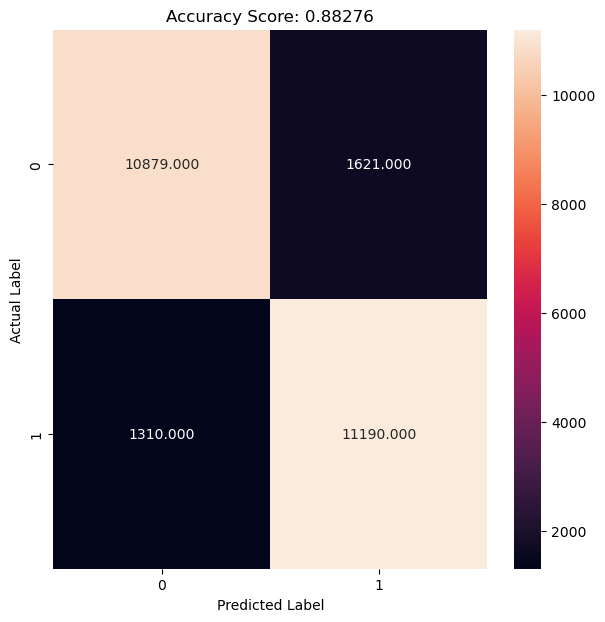

In [22]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot = True, fmt = '.3f')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(title)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     12500
           1       0.87      0.90      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



Inference:

1. There are 1310 reviews incorrectly classified as negative (0), while there are 1621 reviews incorrectly classified as 1 (positive).

2. We have a pretty good precision and recall varying between 0.87 and 0.9. F1-score is 0.88 and is the same for positive and negative classes. 

3. With test accuracy of 88%, the model performs well on the test data although it overfits since the training data accuracy is 96%.

Use the designed model to print the prediction on any one sample

In [24]:
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0 
word_dict['>'] = 1
word_dict['?'] = 2 
reverse_word_dict = { value:key for key, value in word_dict.items() }

In [25]:
def predict(text):
    t = str.maketrans('', '', string.punctuation)
    text = text.translate(t)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < max_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = pad_sequences([input], maxlen=max_len)

    result = model.predict(np.array([padded_input][0]))[0][0]

    predicted_sentiment = ""
    if round(result) == 1:
        predicted_sentiment = "Predicted Sentiment is Positive"
    else:
        predicted_sentiment = "Predicted Sentiment is Negative" 

    return result, predicted_sentiment


In [28]:
decoded = " ".join( [rev_index.get(i - 3, "#") for i in X[0]] )
print(decoded)
result, predicted_sentiment = predict(decoded)
print("Predicted Probability : ", result)
print(predicted_sentiment)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Prediction for the first review shows that the review is positive.

In [29]:
decoded = " ".join( [rev_index.get(i - 3, "#") for i in X[100]] )
print(decoded)
result, predicted_sentiment = predict(decoded)
print("Predicted Probability : ", result)
print(predicted_sentiment)

# i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of # drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was # on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep # the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the # box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10
1/1 [==============================] - 0s 45ms/step
Predicted Probability :  0.14554918
Predicted Sentiment is Negative


Prediction for the 101st review shows that the review is negative.

### PART B

DOMAIN: Social media analytics

CONTEXT: Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based
supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to
other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project,
the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

DATA DESCRIPTION:
The dataset is collected from two news websites, theonion.com and huffingtonpost.com.
This new dataset has the following advantages over the existing Twitter datasets:
Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This
reduces the sparsity and also increases the chance of finding pre-trained embeddings.
Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.
Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the real sarcastic elements

Read and explore the data

In [30]:
data = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [32]:
data.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

There is no missing value

In [33]:
data['article_link'].duplicated().sum()

1

In [34]:
data.loc[data.duplicated(), :]

,article_link,headline,is_sarcastic
22014,https://www.huffingtonpost.comhttp://nymag.com...,hillary clinton vs. herself,0


There seems to be just one duplicate data, so we are ignoring it.

In [35]:
print(data['is_sarcastic'].value_counts())


0    14985
1    11724
Name: is_sarcastic, dtype: int64


<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

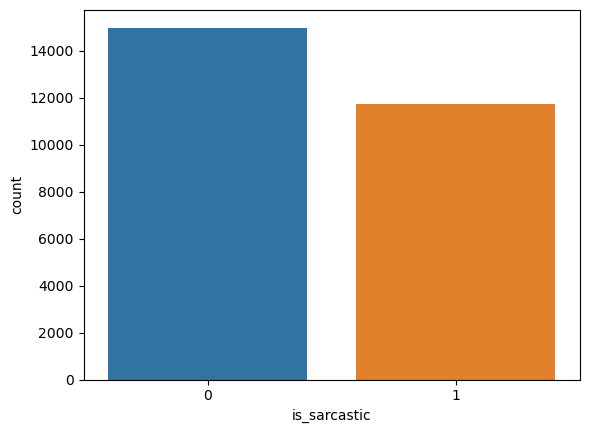

In [36]:
sns.countplot(data['is_sarcastic'])

The dataset seems to be slightly imbalanced, sarcastic data count is quite lower than unsarcastic data

In [39]:
data['source'] = data['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])
data.head()

,article_link,headline,is_sarcastic,source
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,huffingtonpost
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,huffingtonpost
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,theonion
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,theonion
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,huffingtonpost


In [40]:
print(data['source'].value_counts())

huffingtonpost    14985
theonion          11724
Name: source, dtype: int64


<AxesSubplot:xlabel='source', ylabel='count'>

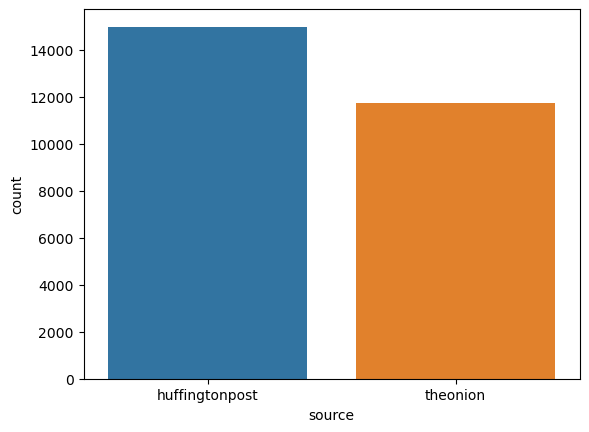

In [41]:
sns.countplot(data['source'])

All sarcastic data seems to be from theonion while all unsarcastic data seems to be from huffingtonpost

Retain relevant columns

In [42]:
data_df = pd.DataFrame({'Features': data['headline'], 'Labels': data['is_sarcastic']})
data_df.head()

,Features,Labels
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [43]:
!pip install wordcloud

In [45]:
from wordcloud import WordCloud 

Unsarcastic WordCloud


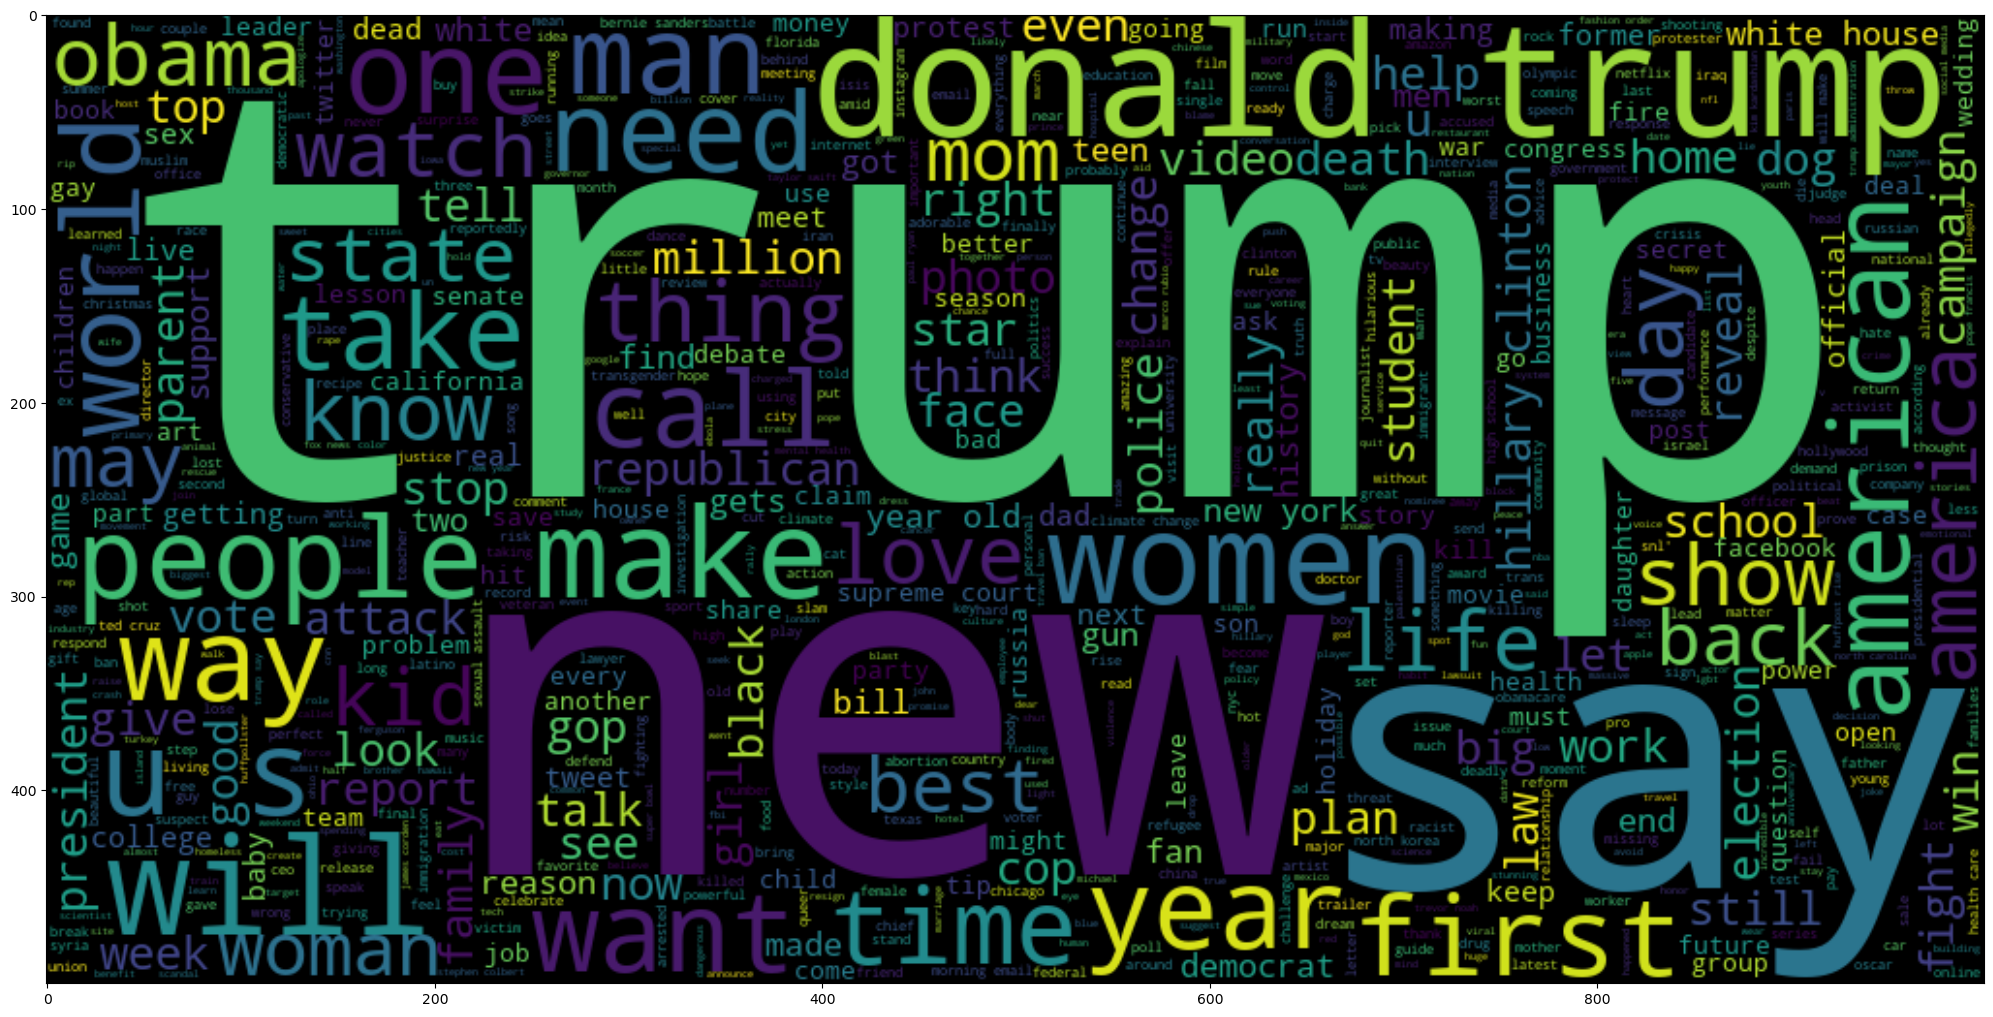

In [46]:
print("Unsarcastic WordCloud")
plt.figure(figsize=(25,25))
wc = WordCloud(max_words = 1000, width = 1000, height=500).generate(" ".join(data_df[data_df['Labels']==0].Features))
plt.imshow(wc,interpolation='bilinear')

Get length of each sentence

In [47]:
data['sentences_lengths'] = data['headline'].apply(lambda x: len(x))
data.head(5)

,article_link,headline,is_sarcastic,source,sentences_lengths
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,huffingtonpost,78
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,huffingtonpost,84
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,theonion,79
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,theonion,84
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,huffingtonpost,64


In [48]:
data['sentences_lengths'].describe()

count    26709.000000
mean        60.910592
std         19.184470
min          7.000000
25%         48.000000
50%         61.000000
75%         73.000000
max        254.000000
Name: sentences_lengths, dtype: float64

Define parameters

In [49]:
vocab_size = 30000
oov_token = '<00V>'
max_length = 100
padding_type = 'post'
trunc_type = 'post'
embed_dim = 100
batch_size = 256
num_epochs = 30

Get indices for words

In [51]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(data_df['Features'])
word_index = tokenizer.word_index

X = tokenizer.texts_to_sequences(data_df['Features'])

print("Indices for words: ", word_index)
print("Tokenized samples: ")

Indices for words:  {'<00V>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'this': 19, 'by': 20, 'after': 21, 'up': 22, 'out': 23, 'be': 24, 'how': 25, 'as': 26, 'it': 27, 'that': 28, 'not': 29, 'are': 30, 'your': 31, 'his': 32, 'what': 33, 'he': 34, 'all': 35, 'just': 36, 'who': 37, 'has': 38, 'will': 39, 'more': 40, 'one': 41, 'into': 42, 'report': 43, 'year': 44, 'why': 45, 'have': 46, 'area': 47, 'over': 48, 'donald': 49, 'u': 50, 'day': 51, 'says': 52, 's': 53, 'can': 54, 'first': 55, 'woman': 56, 'time': 57, 'like': 58, 'her': 59, "trump's": 60, 'old': 61, 'no': 62, 'get': 63, 'off': 64, 'an': 65, 'life': 66, 'people': 67, 'obama': 68, 'now': 69, 'house': 70, 'still': 71, "'": 72, 'women': 73, 'make': 74, 'was': 75, 'than': 76, 'white': 77, 'back': 78, 'my': 79, 'i': 80, 'clinton': 81, 'down': 82, 'if': 83, '5': 84, 'when': 85, 'world': 86, 'could

In [53]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=max_length, padding=padding_type, truncating=trunc_type)

Create features and labels

In [55]:
print("No. of Features: ", len(X))
print(X[0])

y = np.asarray(data_df['Labels'])

print("Number of Labels: ", len(y))
print(y[0])

No. of Features:  26709
[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
Number of Labels:  26709
0


Get vocabulary size

In [56]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

29658


Create a weight matrix using GloVe embeddings

In [64]:
embeddings = {}
for g in open('glove.6B.100d.txt', encoding="utf8"):
    word = g.split(" ")[0]
    embed = g.split(" ")[1:]
    embed = np.asarray(embed, dtype=np.float32)
    embeddings[word] = embed

In [65]:
embed_matrix = np.zeros((num_words, embed_dim))
for word, i in tokenizer.word_index.items():
    embed_vector = embeddings.get(word)
    if embed_vector is not None:
        embed_matrix[i] = embed_vector

In [66]:
embed_matrix.shape

(29658, 100)

Define and compile a Bidirectional LSTM model

In [67]:
y = y.reshape(-1,1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, random_state = 42, test_size = 0.3, stratify = y)

In [69]:
tf.keras.backend.clear_session() 
model_lstm = tf.keras.models.Sequential() 
model_lstm.add(tf.keras.layers.Embedding(num_words, embed_dim, weights = [embed_matrix], input_length=max_length))
model_lstm.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
model_lstm.add(tf.keras.layers.GlobalAveragePooling1D())
model_lstm.add(tf.keras.layers.Dense(32, activation='relu'))
model_lstm.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [70]:
model_lstm.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          2965800   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         84480     
 l)                                                              
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,054,441
Trainable params: 3,054,441
Non-

Fit the model and check the validation accuracy

In [71]:
model_history = model_lstm.fit(X_train, y_train, batch_size = batch_size, epochs = num_epochs, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/30
74/74 [==============================] - 65s 832ms/step - loss: 0.6124 - accuracy: 0.6500 - val_loss: 0.4722 - val_accuracy: 0.7936
Epoch 2/30
74/74 [==============================] - 69s 935ms/step - loss: 0.3843 - accuracy: 0.8398 - val_loss: 0.3675 - val_accuracy: 0.8401
Epoch 3/30
74/74 [==============================] - 69s 934ms/step - loss: 0.2649 - accuracy: 0.8963 - val_loss: 0.3585 - val_accuracy: 0.8344
Epoch 4/30
74/74 [==============================] - 72s 979ms/step - loss: 0.1932 - accuracy: 0.9305 - val_loss: 0.3676 - val_accuracy: 0.8590
Epoch 5/30
74/74 [==============================] - 62s 839ms/step - loss: 0.1280 - accuracy: 0.9573 - val_loss: 0.4610 - val_accuracy: 0.8430
Epoch 6/30
74/74 [==============================] - 69s 936ms/step - loss: 0.1056 - accuracy: 0.9650 - val_loss: 0.4990 - val_accuracy: 0.8570
Epoch 7/30
74/74 [==============================] - 72s 974ms/step - loss: 0.0642 - accuracy: 0.9812 - val_loss: 0.4937 - val_accuracy: 0.8569

In [72]:
m_pred = model_lstm.predict(X_test, batch_size=1024).round().astype(int)

8/8 [==============================] - 9s 885ms/step


In [73]:
y_pred = [np.round(x[0]) for x in m_pred]

Text(0.5, 1.0, 'Accuracy Score: 0.8483713964807188')

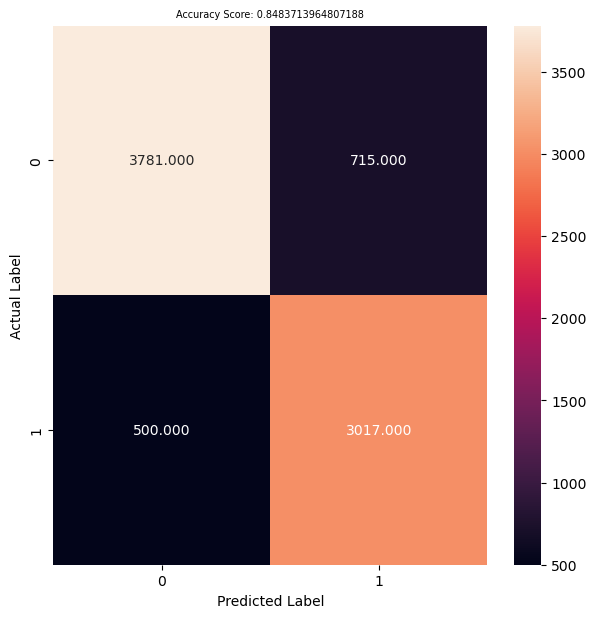

In [76]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot = True, fmt = '.3f')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(title, size = 7)

In [77]:
print(classification_report(y_test, y_pred, target_names = ['Unsarcastic','Sarcastic']))

              precision    recall  f1-score   support

 Unsarcastic       0.88      0.84      0.86      4496
   Sarcastic       0.81      0.86      0.83      3517

    accuracy                           0.85      8013
   macro avg       0.85      0.85      0.85      8013
weighted avg       0.85      0.85      0.85      8013



Inferences:

1. 715 unsarcastic comments are classified incorrectly while 500 sarcastic comments are classified incorrectly.

2. Precision for sarcastic comments is lower than the other parameters, implying the model has a lot of false positives for sarcastic comments.

3. Due to the above, the f1-score of sarcastic comments is lower than unsarcastic comments.

4. Overall test accuracy is quite good at 85%.